<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Héctor Daniel Chávez Orozco y Lyha Espinosa García.

**Fecha:** 08 de marzo del 2021

**Expedientes** : 713442 y 
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 7: Clase 13
**Link al repositorio en Github**: https://github.com/danielch4/Tarea7-8_LEspinoza_HDChavez


Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
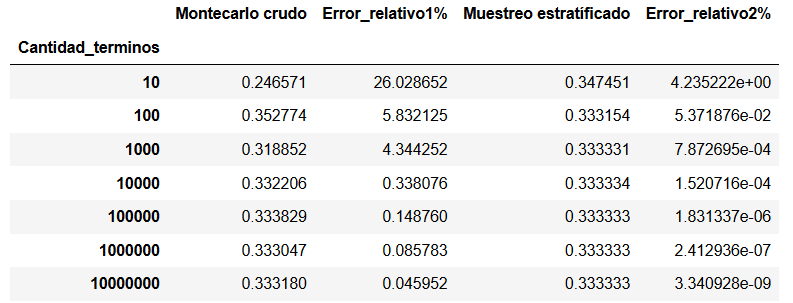

# Solución Lyha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

I = 1/3
# intervalo de integración
a = 0
b = 1
N = np.logspace(1,7,7,dtype=int)  # Cantidad de términos, escalalogaritmica

In [2]:
# Dataframe
resultados = pd.DataFrame(index = N, columns=['Montecarlo crudo', 'Error_relativo1%', 
                                              'Muestreo estratificado', 'Error_relativo2%'], dtype='float')
resultados.index.name = 'Cantidad_terminos'

In [3]:
# MONTECARLO CRUDO
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

# Números aleatorios dependiendo de la cantidad de N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de terminos
i_montecarlo = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))

resultados.loc[N,'Montecarlo crudo'] = i_montecarlo
resultados.loc[N,"Error_relativo1%"] = np.abs(resultados.loc[N,'Montecarlo crudo']-I)*100/I

In [4]:
# MUESTREO ESTRATIFICADO
# Función para hacer N estratos
def muestreo_estratificado(N: 'cantidad de estratos'):
    B = N
    U = np.random.rand(N)
    i = np.arange(0, B)
    return (U + i) / B

m_estra = [muestreo_estratificado(i) for i in N]
i_muestreo = list(map(lambda Y: int_montecarlo(lambda x:x**2, a,b,Y),m_estra))

resultados.loc[N,'Muestreo estratificado'] = i_muestreo
resultados.loc[N,"Error_relativo2%"] = np.abs(resultados.loc[N,'Muestreo estratificado']-I)*100/I
resultados

,Montecarlo crudo,Error_relativo1%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.366726,10.017865,0.335377,6.132284e-01
100,0.346846,4.053721,0.333155,5.341661e-02
1000,0.325034,2.489843,0.333333,1.505077e-04
10000,0.337779,1.333644,0.333333,2.199601e-06
100000,0.334576,0.372919,0.333333,2.710233e-06
1000000,0.333583,0.075019,0.333333,5.354978e-08
10000000,0.333293,0.011964,0.333333,1.624434e-09
